In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

olivetti_faces = fetch_openml("olivetti_faces", as_frame=False ,parser='auto')
X, y = olivetti_faces.data, olivetti_faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=40, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=80, stratify=y_train, random_state=42)

from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

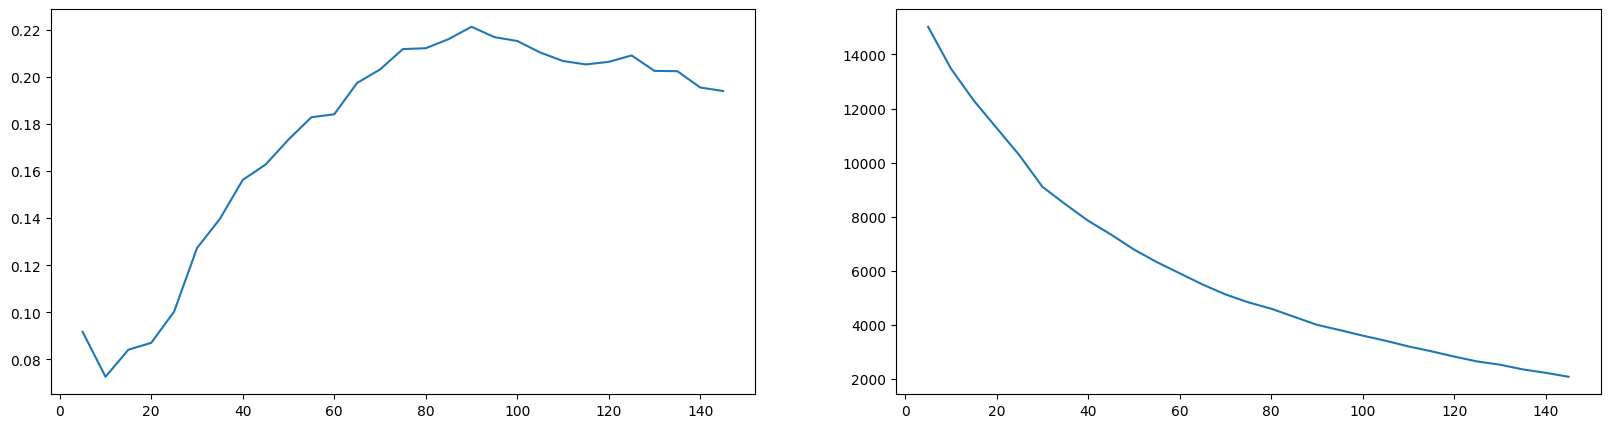

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
inertia_scores = []
kmeans_per_k = []
k_range = range(5, 150, 5)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
inertia_scores = [model.inertia_ for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[np.argmax(silhouette_scores)]
best_model = kmeans_per_k[best_index]
    
figure, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5)) 
axis1.plot([i for i in k_range], silhouette_scores)
axis2.plot([i for i in k_range], inertia_scores )
plt.show()

In [32]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=90, n_init=10)
gm.fit(X_train_pca)
X_new, y_new = gm.sample(20)

In [62]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=90, n_init=10, random_state=42)
bgm.fit(X_train_pca)
X_new, y_new = bgm.sample(20)
y_new

array([ 1,  1,  9, 11, 11, 12, 25, 33, 34, 34, 43, 50, 51, 52, 53, 55, 62,
       67, 69, 87])

Cluster ID: 1


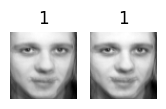

Cluster ID: 9


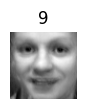

Cluster ID: 11


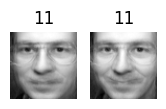

Cluster ID: 12


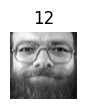

Cluster ID: 25


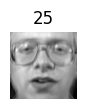

Cluster ID: 33


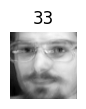

Cluster ID: 34


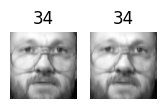

Cluster ID: 43


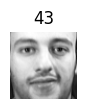

Cluster ID: 50


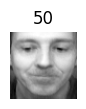

Cluster ID: 51


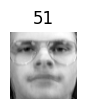

Cluster ID: 52


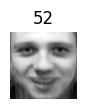

Cluster ID: 53


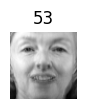

Cluster ID: 55


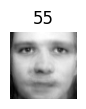

Cluster ID: 62


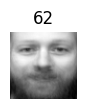

Cluster ID: 67


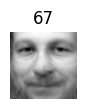

Cluster ID: 69


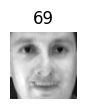

Cluster ID: 87


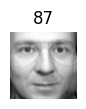

In [63]:
def plot_faces(faces, labels, n_cols=5):    
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(y_new):
    print(f"Cluster ID: {cluster_id}")
    in_cluster = y_new == cluster_id
    faces = X_new[in_cluster]
    labels = y_new[in_cluster]
    plot_faces(pca.inverse_transform(faces), labels)